In [45]:
#wine_info에서 price,ml,sweet결측치 지우고 price 이상치 지움

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df=pd.read_csv('D:/GitHub/spara_ml/wine_info.csv')
df = df.dropna(subset=['price']).copy()
df = df.dropna(subset=['ml'])
df = df.dropna(subset=['sweet'])
df['price/100ml'] = df['price']/(df['ml']/100)
df['price/100ml'] = round(df['price/100ml'])
q1 = df['price/100ml'].quantile(0.25)
q3 = df['price/100ml'].quantile(0.75)
iqr = q3 -q1
upper_limit2 = q3 + 1.5 * iqr
lower_limit2 = q1 - 1.5 * iqr
print(q1,q3,iqr,upper_limit2, lower_limit2)
cond2 = (df['price/100ml'] < upper_limit2)
df = df[cond2]
df.info()


5333.0 21867.0 16534.0 46668.0 -19468.0
<class 'pandas.core.frame.DataFrame'>
Index: 11327 entries, 0 to 21604
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11327 non-null  int64  
 1   name         11327 non-null  object 
 2   producer     11327 non-null  object 
 3   nation       11327 non-null  object 
 4   local1       10878 non-null  object 
 5   local2       5666 non-null   object 
 6   local3       1667 non-null   object 
 7   local4       1 non-null      object 
 8   varieties1   11164 non-null  object 
 9   varieties2   4101 non-null   object 
 10  varieties3   2234 non-null   object 
 11  varieties4   709 non-null    object 
 12  varieties5   204 non-null    object 
 13  varieties6   67 non-null     object 
 14  varieties7   21 non-null     object 
 15  varieties8   10 non-null     object 
 16  varieties9   4 non-null      object 
 17  varieties10  4 non-null      object 
 18  varieties11

4개컬럼 레이블인코딩

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
le.fit(df['sweet'].unique())
df['sweet_le'] = le.transform(df['sweet'])
print(le.classes_)


le.fit(df['acidity'].unique())
df['acidity_le'] = le.transform(df[['acidity']])
print(le.classes_)

le.fit(df['body'].unique())
df['body_le'] = le.transform(df[['body']])
print(le.classes_)

le.fit(df['tannin'].unique())
df['tannin_le'] = le.transform(df[['tannin']])
print(le.classes_)

['SWEET1' 'SWEET2' 'SWEET3' 'SWEET4' 'SWEET5']
['ACIDITY1' 'ACIDITY2' 'ACIDITY3' 'ACIDITY4' 'ACIDITY5']
['BODY1' 'BODY2' 'BODY3' 'BODY4' 'BODY5']
['TANNIN1' 'TANNIN2' 'TANNIN3' 'TANNIN4' 'TANNIN5']


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


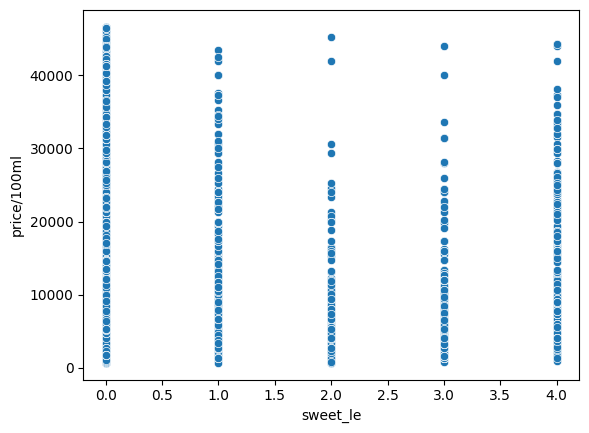

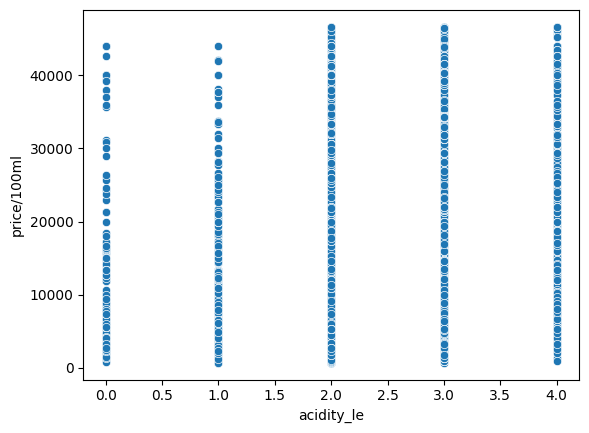

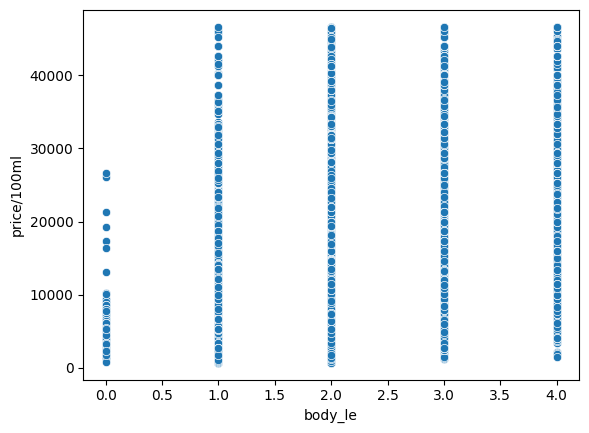

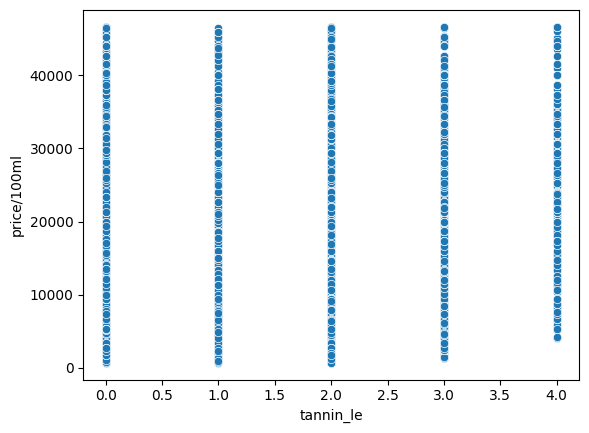

In [48]:
# 'sweet_le'과 'price/100ml' 간의 산점도
sns.scatterplot(x='sweet_le', y='price/100ml', data=df)
plt.show()

# 'acidity_le'과 'price/100ml' 간의 산점도
sns.scatterplot(x='acidity_le', y='price/100ml', data=df)
plt.show()

# 'body_le'과 'price/100ml' 간의 산점도
sns.scatterplot(x='body_le', y='price/100ml', data=df)
plt.show()

# 'tannin_le'과 'price/100ml' 간의 산점도
sns.scatterplot(x='tannin_le', y='price/100ml', data=df)
plt.show()

4개컬럼으로 다중선형회귀 적용해보기

In [49]:
# #속성(변수) 2가지 선택
# X = df[['sweet_le', 'acidity_le','body_le','tannin_le']]
# y = df[['price/100ml']]

# from sklearn.linear_model import LinearRegression
# import matplotlib.pyplot as plot

# #단순 회귀 모델 생성
# model_lr = LinearRegression()
# model_lr.fit(X, y)

# #예측 모델 생성
# y_pred = model_lr.predict(X)

# #가중치와 y절편 출력
# print('가중치 a : ', model_lr.coef_)
# print('y절편 : ', model_lr.intercept_)

# #결정계수(R-squared)
# relation_square = model_lr.score(X, y)
# print('결정계수 : ', relation_square)

# #mse
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y, y_pred)
# mse

# # #seaborn으로 나타내기
# # import seaborn as sns
# # ax1 = sns.distplot(y, hist = False, label = 'y실제')
# # ax2 = sns.distplot(y_pred, hist = False, label = 'y예측')
# # plot.show()


In [50]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import StandardScaler

# # X 변수 선택
# X = df[['sweet_le', 'acidity_le', 'body_le', 'tannin_le']]

# # y 변수 선택
# y = df['price/100ml']

# # 데이터를 학습용과 테스트용으로 분리
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # 데이터 표준화 (선택적인 단계)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # 다중 회귀 모델 생성
# model = LinearRegression()

# # 모델 학습
# model.fit(X_train_scaled, y_train)

# # 학습용 데이터에 대한 예측
# train_predictions = model.predict(X_train_scaled)

# # 테스트용 데이터에 대한 예측
# test_predictions = model.predict(X_test_scaled)

# # 성능 평가
# train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
# test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
# r2 = r2_score(y_test, test_predictions)

# print(f'Training RMSE: {train_rmse}')
# print(f'Test RMSE: {test_rmse}')
# print(f'R-squared: {r2}')


랜덤포레스트 적용해보기

In [51]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # X 변수 선택
# X = df[['sweet_le', 'acidity_le','body_le','tannin_le']]

# # y 변수 선택
# y = df['price/100ml']

# # 데이터를 학습용과 테스트용으로 분리
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # 랜덤 포레스트 모델 생성
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# # 모델 학습
# rf_model.fit(X_train, y_train)

# # 테스트 데이터에 대한 예측
# y_pred = rf_model.predict(X_test)

# # 성능 평가
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')


Mean Squared Error: 73249415.66233371
